Представьте, что вы работаете аналитиком в компании, которая занимается арендой велосипедов. Коллега из офиса в Лондоне прислал вам данные за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.
Задания
1.	Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.
2.	Постройте график по числу поездок по дате и времени.
3.	Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.
4.	Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.
5.	Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.
6.	Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.
7.	Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.
8.	Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.
Описание данных
•	timestamp – дата и время (точность до часа)
•	cnt – количество аренд велосипедов за этот час
•	t1 – температура, в С
•	t2 – температура "ощущается как", в С 
•	hum – влажность (%)
•	wind_speed – скорость ветра, км/ч
•	weather_code – погодные условия:
1 – ясно (SKC)
2 – преимущественно ясно / встречаются отдельные облака (SCT)
3 – облачно / значительные облака (BKN)
4 – пасмурно (OVC)
7 – небольшой дождь Rain/ light Rain shower/ Light rain 
10 – дождь с грозой
26 – снегопад 
94 – ледяной туман (да, такое бывает!)
•	isholiday – является ли день праздником (1 – праздник, 0 – нет)
•	isweekend –  является ли день выходным (1 – выходной, 0 – нет)
•	season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl



In [3]:
mpl.style.use('ggplot')


In [5]:
rent_data = pd.read_csv('london.csv')
rent_data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [7]:
rent_data.shape

(17414, 10)

In [9]:
rent_data['timestamp'] = pd.to_datetime(rent_data['timestamp'])

In [11]:
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


Text(0.5, 1.0, 'Число поездок в указанные временные отрезки времени(по часам)')

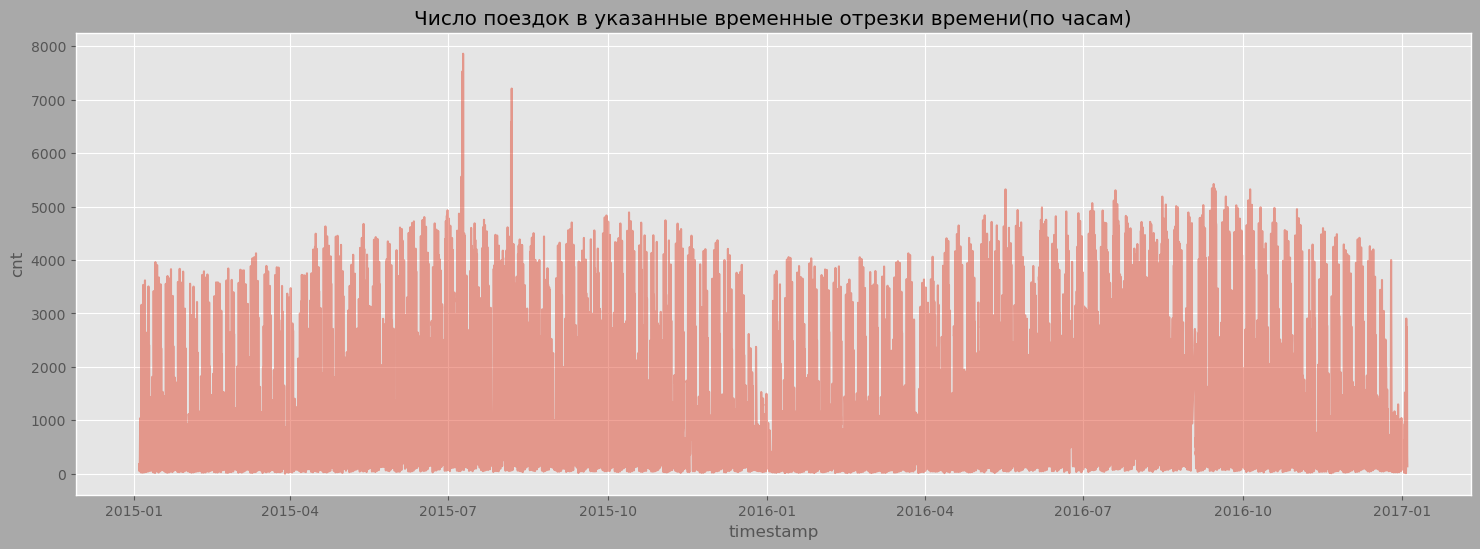

In [13]:
plt.figure(figsize=(18, 6), facecolor='#A9A9A9')
sns.lineplot(data=rent_data, x='timestamp', y='cnt', alpha=0.5)
plt.title('Число поездок в указанные временные отрезки времени(по часам)')

In [ ]:
ПО ЭТИМ ДАННЫМ СЛОЖНО ЧТО-ТО ПОНЯТЬ, ГЛЯДЯ НА ГРАФИК, ПОЭТОМУ ПОПРОБУЕМ НЕМНОГО ПРЕОБРАЗОВАТЬ ИХ. Посчитаем число поездок по дням

<Axes: xlabel='timestamp'>

<Figure size 1800x600 with 0 Axes>

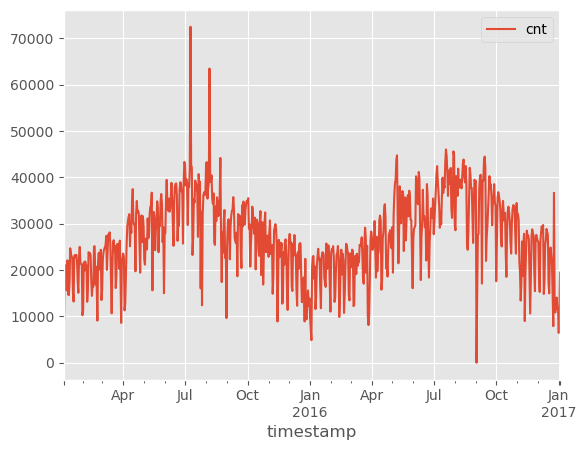

In [15]:
df = rent_data.set_index(keys='timestamp', drop=True)
plt.figure(figsize=(18, 6), facecolor='#A9A9A9')
df.resample('D').agg({'cnt': 'sum'}).plot()

<Axes: xlabel='timestamp'>

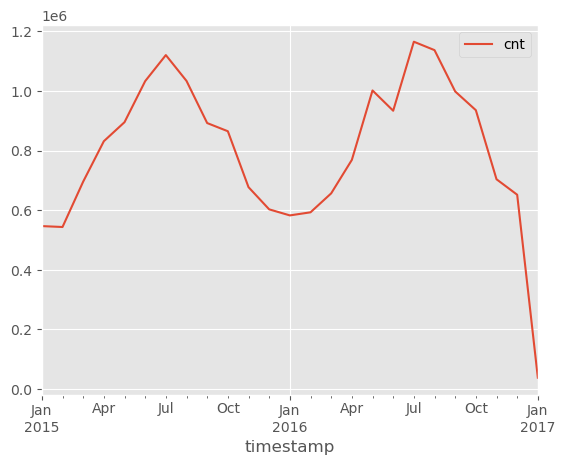

In [17]:
df.resample('ME').agg({'cnt': 'sum'}).plot()

In [19]:
df_by_day = df.resample("D").cnt.sum().reset_index()


In [21]:
df_by_day['rolling_3_mean'] = df_by_day['cnt'].rolling(window=3, min_periods=1).mean()
df_by_day

,timestamp,cnt,rolling_3_mean
0,2015-01-04,9234,9234.000000
1,2015-01-05,20372,14803.000000
2,2015-01-06,20613,16739.666667
3,2015-01-07,21064,20683.000000
4,2015-01-08,15601,19092.666667
...,...,...,...
726,2016-12-30,11566,12682.000000
727,2016-12-31,11424,12347.333333
728,2017-01-01,6421,9803.666667
729,2017-01-02,11823,9889.333333


Text(0.5, 1.0, 'Скользящее среднее число поездок в указанные временные отрезки времени(по дням)')

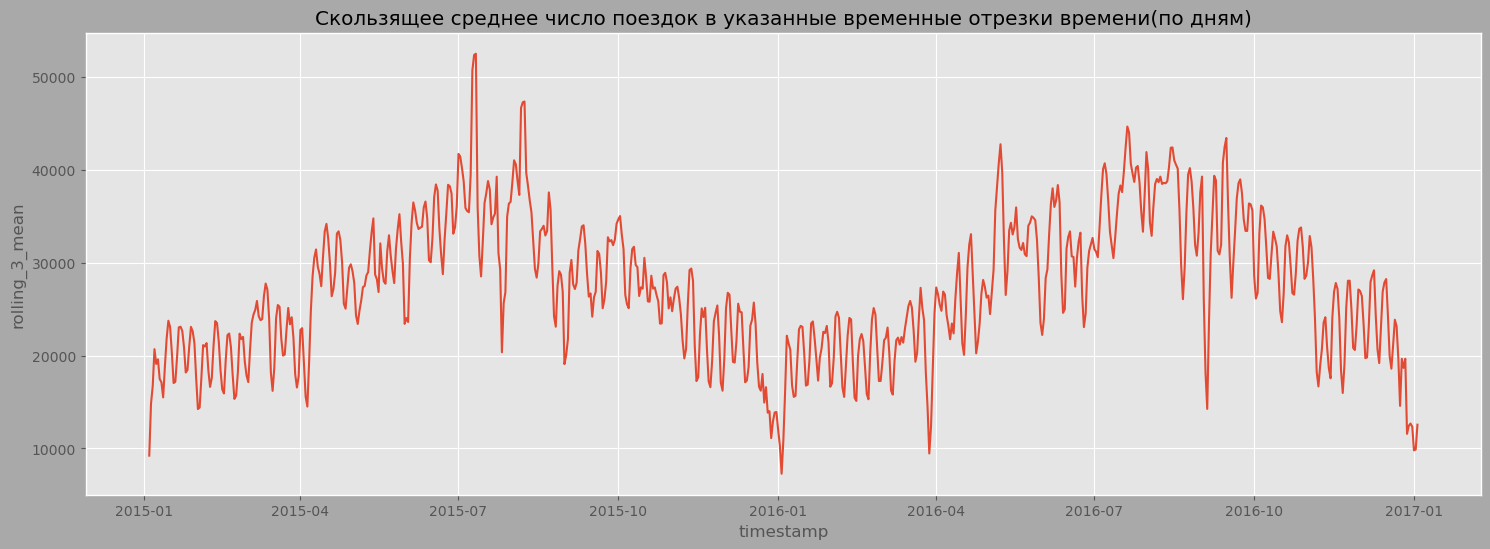

In [23]:
plt.figure(figsize=(18, 6), facecolor='#A9A9A9')
sns.lineplot(data=df_by_day, x='timestamp', y='rolling_3_mean')
plt.title('Скользящее среднее число поездок в указанные временные отрезки времени(по дням)')

In [27]:
rol_mean = df_by_day[df_by_day['timestamp'] == '2015-07-09'].rolling_3_mean.astype('int64').iloc[0]
f'Скользящее среднее(window=3) количества аренд на дату 2015-07-09 - {rol_mean}'

'Скользящее среднее(window=3) количества аренд на дату 2015-07-09 - 50705'

In [29]:
df_by_day['difer_cnt'] = df_by_day['cnt'] - df_by_day['rolling_3_mean']
std_cnt = round(np.std(df_by_day['difer_cnt']),3)
f'Стандартное отклонение при подсчете скользящего среднего(window=3) = {std_cnt}'

'Стандартное отклонение при подсчете скользящего среднего(window=3) = 4556.997'

In [31]:
#Границы 99% доверительного интеревала
df_by_day['high_bound'] = df_by_day.rolling_3_mean + 2.576*std_cnt
df_by_day['low_bound'] = df_by_day.rolling_3_mean - 2.576*std_cnt
df_by_day

,timestamp,cnt,rolling_3_mean,difer_cnt,high_bound,low_bound
0,2015-01-04,9234,9234.000000,0.000000,20972.824272,-2504.824272
1,2015-01-05,20372,14803.000000,5569.000000,26541.824272,3064.175728
2,2015-01-06,20613,16739.666667,3873.333333,28478.490939,5000.842395
3,2015-01-07,21064,20683.000000,381.000000,32421.824272,8944.175728
4,2015-01-08,15601,19092.666667,-3491.666667,30831.490939,7353.842395
...,...,...,...,...,...,...
726,2016-12-30,11566,12682.000000,-1116.000000,24420.824272,943.175728
727,2016-12-31,11424,12347.333333,-923.333333,24086.157605,608.509061
728,2017-01-01,6421,9803.666667,-3382.666667,21542.490939,-1935.157605
729,2017-01-02,11823,9889.333333,1933.666667,21628.157605,-1849.490939


In [259]:
#Найдем аномальные даты, когда число заказов превышало верхнюю границу посчитанного доверительного интервала
#Попробуем найти причину данных аномалий
abnormal_days = df_by_day[df_by_day['cnt'] > df_by_day['high_bound']]
abnormal_days

,timestamp,cnt,rolling_3_mean,difer_cnt,high_bound,low_bound
186,2015-07-09,72504,50705.000000,21799.000000,62443.824272,38966.175728
214,2015-08-06,63468,46627.333333,16840.666667,58366.157605,34888.509061
609,2016-09-04,27512,14259.000000,13253.000000,25997.824272,2520.175728
721,2016-12-25,36653,19650.666667,17002.333333,31389.490939,7911.842395


In [35]:
rent_data['day'] = rent_data['timestamp'].dt.date
rent_data['day'] = pd.to_datetime(rent_data['day'])

In [67]:
#Наибольшее число аренд было зафиксировано 2015-07-09. Посмотрим информацию из общего фрэйма за весь день
high_abnormal = rent_data.query('day == "2015-07-09"')
high_abnormal

C:\Users\tsyto\AppData\Local\Temp\ipykernel_3436\3620412298.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  high_abnormal = rent_data.query('day == "2015-07-09"')


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day
4453,2015-07-09 00:00:00,400,16.0,16.0,55.0,14.0,1.0,0.0,0.0,1.0,2015-07-09
4454,2015-07-09 01:00:00,212,15.5,15.5,59.0,14.0,1.0,0.0,0.0,1.0,2015-07-09
4455,2015-07-09 02:00:00,111,14.0,14.0,67.0,15.0,1.0,0.0,0.0,1.0,2015-07-09
4456,2015-07-09 03:00:00,81,14.0,14.0,63.0,18.5,1.0,0.0,0.0,1.0,2015-07-09
4457,2015-07-09 04:00:00,76,14.0,14.0,63.0,18.0,1.0,0.0,0.0,1.0,2015-07-09
4458,2015-07-09 05:00:00,269,13.0,13.0,67.0,17.0,1.0,0.0,0.0,1.0,2015-07-09
4459,2015-07-09 06:00:00,1724,13.0,13.0,67.0,16.0,1.0,0.0,0.0,1.0,2015-07-09
4460,2015-07-09 07:00:00,5309,13.5,13.5,65.0,17.0,1.0,0.0,0.0,1.0,2015-07-09
4461,2015-07-09 08:00:00,7531,14.5,14.5,61.0,19.0,2.0,0.0,0.0,1.0,2015-07-09
4462,2015-07-09 09:00:00,4832,15.0,15.0,59.0,16.0,2.0,0.0,0.0,1.0,2015-07-09


In [73]:
df_by_day[df_by_day.timestamp == '2015-07-07']

,timestamp,cnt,rolling_3_mean,difer_cnt,high_bound,low_bound
184,2015-07-07,37908,35414.666667,2493.333333,47153.490939,23675.842395


In [75]:
df_by_day[df_by_day.timestamp == '2015-07-08']

,timestamp,cnt,rolling_3_mean,difer_cnt,high_bound,low_bound
185,2015-07-08,41703,39410.333333,2292.666667,51149.157605,27671.509061


In [53]:
rent_data.mean()

timestamp       2016-01-03 22:31:00.571953664
cnt                               1143.101642
t1                                  12.468091
t2                                  11.520836
hum                                 72.324954
wind_speed                          15.913063
weather_code                         2.722752
is_holiday                           0.022051
is_weekend                           0.285403
season                               1.492075
day             2016-01-03 11:00:12.817273344
dtype: object

In [77]:
high_abnormal.mean()

timestamp       2015-07-09 11:30:00
cnt                          3021.0
t1                        17.791667
t2                        17.541667
hum                       48.979167
wind_speed                12.979167
weather_code               1.166667
is_holiday                      0.0
is_weekend                      0.0
season                          1.0
day             2015-07-09 00:00:00
dtype: object

Из этих Данных не следует какой-то явной аномалии, почему именно в этот день число аренд вело вышло за доверительный интервал рассчитанный исходя из среднего значения за 3 дня. Предыдущие 2 дня аренд было значительно меньше, а 2015-07-09 был теплый_ясный_летний день.

In [79]:
#Найдем аномальные даты, когда число заказов превышало верхнюю границу посчитанного доверительного интервала
#Попробуем найти причину данных аномалий
abnormal_days1 = df_by_day[df_by_day['cnt'] < df_by_day['low_bound']]
abnormal_days1

,timestamp,cnt,rolling_3_mean,difer_cnt,high_bound,low_bound
130,2015-05-14,15609,28709.333333,-13100.333333,40448.157605,16970.509061
189,2015-07-12,23240,36036.666667,-12796.666667,47775.490939,24297.842395
201,2015-07-24,16034,31013.666667,-14979.666667,42752.490939,19274.842395
232,2015-08-24,17400,29529.333333,-12129.333333,41268.157605,17790.509061
314,2015-11-14,8898,21037.333333,-12139.333333,32776.157605,9298.509061
607,2016-09-02,0,26086.333333,-26086.333333,37825.157605,14347.509061
615,2016-09-10,17080,31262.000000,-14182.000000,43000.824272,19523.175728
621,2016-09-16,21967,36193.333333,-14226.333333,47932.157605,24454.509061
678,2016-11-12,8990,20878.000000,-11888.000000,32616.824272,9139.175728


In [93]:
rent_data.set_index('timestamp')
low_abnormal = rent_data.set_index('timestamp')['2016-09-01':'2016-09-03' ]
low_abnormal

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day
timestamp,,,,,,,,,,
2016-09-01 00:00:00,322,18.0,18.0,68.0,15.0,1.0,0.0,0.0,2.0,2016-09-01
2016-09-01 01:00:00,186,17.0,17.0,73.0,16.0,1.0,0.0,0.0,2.0,2016-09-01
2016-09-01 02:00:00,89,16.5,16.5,75.0,16.0,1.0,0.0,0.0,2.0,2016-09-01
2016-09-01 03:00:00,56,16.0,16.0,74.5,11.0,2.0,0.0,0.0,2.0,2016-09-01
2016-09-01 04:00:00,64,16.0,16.0,77.0,12.0,2.0,0.0,0.0,2.0,2016-09-01
2016-09-01 05:00:00,133,15.0,15.0,82.0,11.0,2.0,0.0,0.0,2.0,2016-09-01
2016-09-01 06:00:00,811,15.0,15.0,82.0,12.0,2.0,0.0,0.0,2.0,2016-09-01
2016-09-01 07:00:00,2663,16.0,16.0,77.0,11.0,2.0,0.0,0.0,2.0,2016-09-01
2016-09-01 08:00:00,4631,16.5,16.5,75.0,9.0,2.0,0.0,0.0,2.0,2016-09-01


C 2016-09-01 22:00:00 до 2016-09-03 12:00:00 данные не записывались, поэтому аренды в этот день вышли за доверительный интервал(равны 0)